In [62]:
raw_data <- read.csv("Data_SSL_PSM_RAT_AGE_0_30.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 149279

In [63]:
final_features<-raw_data[,c('SSL_SCORE','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [64]:
complete_data <- final_features[complete.cases(final_features),]

In [65]:
nrow(complete_data)

[1] 149279

In [66]:
library(MatchIt)
library(dplyr)
library(ggplot2)

In [67]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,109903,328.5514,0.09113404
1,39376,316.3591,0.09946829


In [68]:
with(complete_data, t.test(SSL_SCORE~ RACE_CODE_CD))


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 90.377, df = 106370, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.92789 12.45672
sample estimates:
mean in group 0 mean in group 1 
       328.5514        316.3591 


In [69]:
ecls_cov <- c( 'PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
               'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
               'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS')

In [70]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  select(one_of(ecls_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

Adding missing grouping variables: `RACE_CODE_CD`


RACE_CODE_CD,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS
0,0.04966197,0.07360127,0.24151297,0.25227701,0.4874298,-0.06210931,0.06428396
1,0.00279358,0.01127590,0.05640492,0.03751016,0.2834976,-0.02574411,0.01084417


In [71]:
lapply(ecls_cov, function(v) {
    t.test(complete_data[, v] ~ complete_data[, 'RACE_CODE_CD'])
})

[[1]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 60.039, df = 138610, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04533837 0.04839841
sample estimates:
mean in group 0 mean in group 1 
     0.04966197      0.00279358 


[[2]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 56.678, df = 146370, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06017008 0.06448064
sample estimates:
mean in group 0 mean in group 1 
     0.07360127      0.01127590 


[[3]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 81.466, df = 141080, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1806545 0.1895616
sample estimates:
mean in group 0 mean in group 1 
  

In [72]:
m_ps <- glm(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
            family = binomial(), data = complete_data)
summary(m_ps)


Call:
glm(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, family = binomial(), data = complete_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0768  -0.9453  -0.5945   1.4078   5.1192  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                    -0.556382   0.007892 -70.495
PREDICTOR_RAT_AGE_AT_LATEST_ARRESTless than 20 -0.359293   0.013563 -26.492
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS        -1.364757   0.099919 -13.659
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT        -1.044160   0.050338 -20.743
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES         -0.745591   0.024658 -30.237
PREDICTOR_RAT_GANG

In [73]:
prs_df <- data.frame(pr_score = predict(m_ps, type = "response"),
                     RACE_CODE_CD = m_ps$model$RACE_CODE_CD)
head(prs_df)

pr_score,RACE_CODE_CD
1.194517e-03,0
3.592706e-06,1
9.994188e-04,1
2.176737e-04,0
3.920895e-03,0
1.800044e-05,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


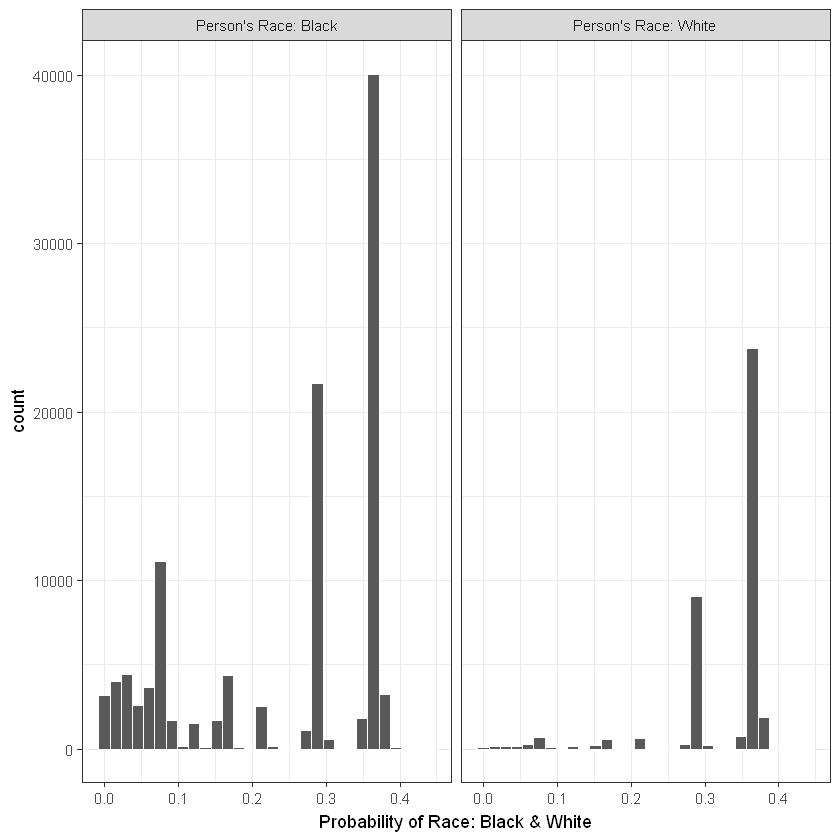

In [74]:
labs <- paste("Person's Race:", c("Black", "White"))
prs_df %>%
  mutate(RACE_CODE_CD = ifelse(RACE_CODE_CD == 0, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~RACE_CODE_CD) +
  xlab("Probability of Race: Black & White") +
  theme_bw()

In [75]:
ecls_nomiss <- complete_data %>%  # MatchIt does not allow missing values
  select(SSL_SCORE, RACE_CODE_CD,PREDICTOR_RAT_AGE_AT_LATEST_ARREST, one_of(ecls_cov)) %>%
  na.omit()


In [76]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = ecls_nomiss)

In [77]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = ecls_nomiss, method = "nearest")

Sample sizes:
          Control Treated
All        109903   39376
Matched     39376   39376
Unmatched   70527       0
Discarded       0       0


In [78]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

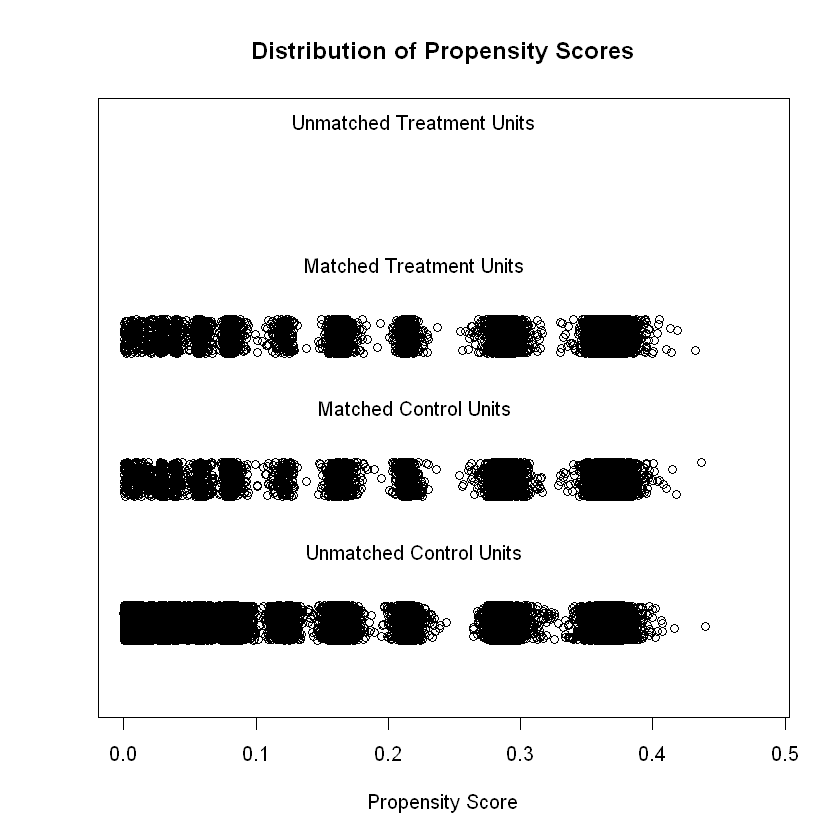

In [79]:
plot(mod_match, type = "jitter")

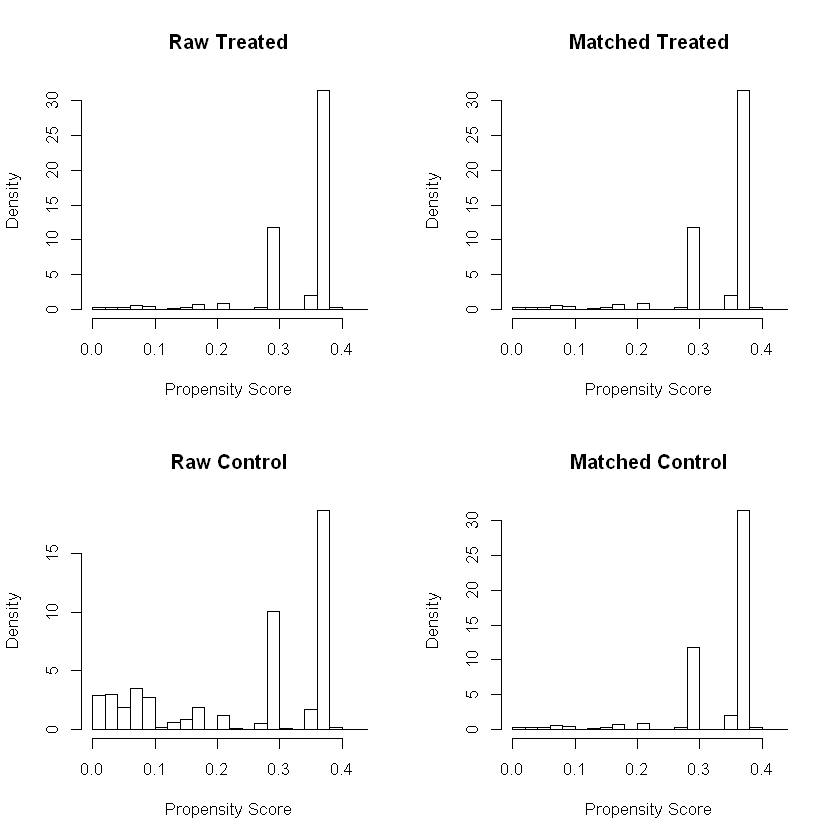

In [80]:
plot(mod_match, type = "hist")

In [81]:
head(matched)

,SSL_SCORE,RACE_CODE_CD,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,distance,weights
2,500,1,20-30,0,9,1,1,0,1.0,0,3.592706e-06,1
3,500,1,less than 20,1,2,1,1,3,1.0,0,9.994188e-04,1
10,489,0,less than 20,2,2,1,1,4,-0.6,1,1.707803e-04,1
13,485,1,less than 20,1,3,1,1,0,0.6,0,3.289662e-04,1
32,455,1,20-30,2,2,2,1,3,0.7,0,1.705956e-04,1
45,445,0,less than 20,1,2,1,1,0,-0.2,1,6.450138e-04,1


The following objects are masked from matched (pos = 3):

    distance, PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    weights



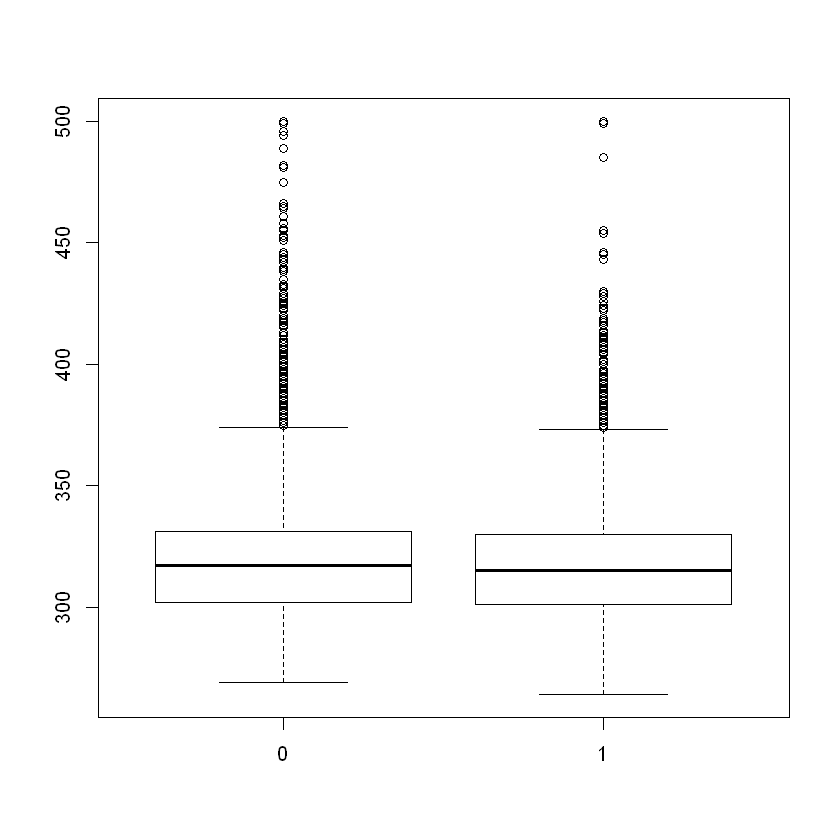

In [82]:
# Doing T - test on matched records
attach(matched)
boxplot(SSL_SCORE~RACE_CODE_CD)

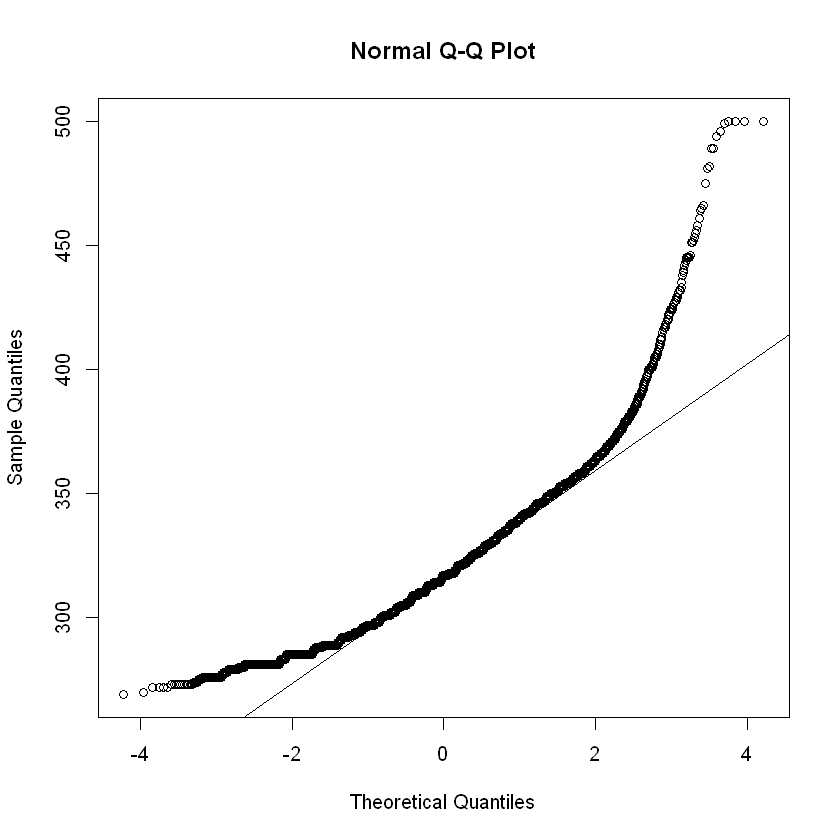

In [83]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)
# Normal QQ Plot for RACE == BLACK
qqnorm(race_black$SSL_SCORE)
qqline(race_black$SSL_SCORE)

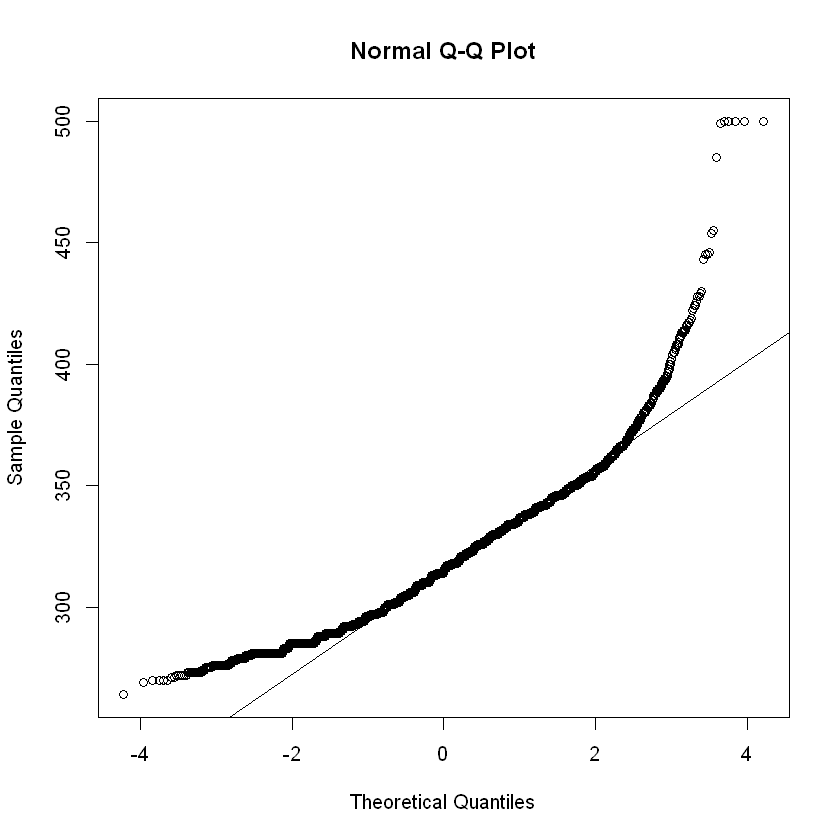

In [84]:
# Normal QQ Plot for RACE == WHITE
qqnorm(race_white$SSL_SCORE)
qqline(race_white$SSL_SCORE)

In [85]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 12.867, df = 78138, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.606943 2.184504
sample estimates:
mean in group 0 mean in group 1 
       318.2549        316.3591 
